<b>
!RUNS ON LINUX ONLY!<br>
Requires EMBOSS and MAFFT installed
</b>

In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Starting with having downloaded fasta and feature table files of <i>Pyrococus abyssi</i> chromosome assembly (NCBI AC AL096836.1)

Obtaining the CDS coordinate table of the <i>P. abyssi</i> chromosome with <b>features2CDSs.py</b> script:

In [2]:
!python3 ~/Programs/my_scripts/features2CDSs.py -i p_abyssi.txt -o p_abyssi.xls

wait..
1783 CDSs stored
..done


### Obtaining CDS upstream sequences for SD PWM construction with MEME

Selecting and filtering CDSs with no "hypothetical" or "putative" in their names:

In [3]:
!grep -E -iv "hypothetical|putative" p_abyssi.xls > temp.xls
good_cds = pd.read_csv("temp.xls", sep="\t", index_col=False)
!rm temp.xls

In [4]:
good_cds.head(n=3)

min_coord  max_coord  ori  pseudo  protein_id  \
0          1         61   -1     NaN         NaN   
1        125        619   -1     NaN         NaN   
2        631       1089   -1     NaN         NaN   

                                      product  
0           LSU ribosomal protein L1P (rpl1P)  
1           rpl11P LSU ribosomal protein L11P  
2  nusG transcription antitermination protein

In [5]:
all(pd.isna(good_cds["pseudo"]))

True

In [6]:
any(pd.isna(good_cds["product"]))

True

In [7]:
good_cds = good_cds[~pd.isna(good_cds["product"])]

Filtering selected CDSs to be at least 300 nt long:

In [8]:
good_cds = good_cds[good_cds["max_coord"] - good_cds["min_coord"] >= 300].reset_index(drop=True)

In [9]:
len(good_cds)

972

Randomly sampling 50 CDS of the filtered set:

In [9]:
random.seed(777)
sampled_cds = good_cds.iloc[random.choices(range(len(good_cds)), k=50)].reset_index(drop=True)
random.seed()

In [10]:
sampled_cds["product"].nunique() == len(sampled_cds)

True

In [11]:
sampled_cds

min_coord  max_coord  ori  pseudo  protein_id  \
0      362224     363492    1     NaN         NaN   
1      670857     672062   -1     NaN         NaN   
2      543976     544497    1     NaN         NaN   
3      422356     423396    1     NaN         NaN   
4      504055     504501    1     NaN         NaN   
5     1274938    1275456   -1     NaN         NaN   
6     1629553    1630557    1     NaN         NaN   
7     1584032    1585261    1     NaN         NaN   
8     1008006    1008602    1     NaN         NaN   
9      575710     576507    1     NaN         NaN   
10     441245     441991   -1     NaN         NaN   
11    1753260    1754417   -1     NaN         NaN   
12    1649057    1650400   -1     NaN         NaN   
13    1137420    1138271    1     NaN         NaN   
14    1519091    1520035    1     NaN         NaN   
15     168296     168742    1     NaN         NaN   
16    1257727    1258335    1     NaN         NaN   
17    1658027    1659223   -1     NaN         NaN   
18        631       1089   -1     NaN         NaN   
19    1044682    1046022   -1     NaN         NaN   
20     505060     505473    1     NaN         NaN   
21     938160     940778   -1     NaN         NaN   
22     172193     173311    1     NaN         NaN   
23    1093825    1094694    1     NaN         NaN   
24     332534     333166   -1     NaN         NaN   
25     784853     786049   -1     NaN         NaN   
26    1374851    1376059   -1     NaN         NaN   
27    1391206    1391943    1     NaN         NaN   
28     942333     943322    1     NaN         NaN   
29      58109      58666   -1     NaN         NaN   
30     995509     996693   -1     NaN         NaN   
31     925189     927012    1     NaN         NaN   
32     132198     133397    1     NaN         NaN   
33     871941     872957    1     NaN         NaN   
34     427237     428250    1     NaN         NaN   
35    1311313    1312968    1     NaN         NaN   
36     771553     772650   -1     NaN         NaN   
37     874041     875495    1     NaN         NaN   
38     267930     269027   -1     NaN         NaN   
39     657848     660976   -1     NaN         NaN   
40     344572     345990   -1     NaN         NaN   
41     905815     907359    1     NaN         NaN   
42     150138     150851    1     NaN         NaN   
43     291349     292476   -1     NaN         NaN   
44    1691611    1692174    1     NaN         NaN   
45    1265699    1266826   -1     NaN         NaN   
46     853742     854179   -1     NaN         NaN   
47    1516336    1517460    1     NaN         NaN   
48    1653743    1656487   -1     NaN         NaN   
49     462689     463402   -1     NaN         NaN   

                                              product  
0                       Predicted DNA-binding protein  
1        dfp DNA/pantothenate metabolism flavoprotein  
2   Carbonic anhydrase/acetyltransferase, containi...  
3              leuB-2 3-isopropylmalate dehydrogenase  
4              rps13P SSU ribosomal protein S13P/S18E  
5          RNA binding protein, containing PUA domain  
6   purM phosphoribosylformylglycinamidine cyclo-l...  
7                               Peptidase, M50 family  
8   phoU phosphate ABC transporter, regulatory pro...  
9   Predicted exosome subunit, RNA-binding protein...  
10  trpA tryptophan synthase, subunit alpha (EC 4....  
11                     Sun/NOL1/NOP nucleolar protein  
12                     Glycosyl transferase, family 2  
13  dTDP 4-dehydrorhamnose reductase (dTDP-L-rhamn...  
14        Na+/Ca2+ exchange integral membrane protein  
15           moaE molybdopterin synthase, large chain  
16  iorB indolepyruvate ferredoxin oxidoreductase,...  
17  2-amino-3-oxobutanoate synthase (glycine C-ace...  
18         nusG transcription antitermination protein  
19      thiD hydroxymethylpyrimidine phosphate kinase  
20                  rps11P SSU ribosomal protein S11P  
21                         DEAD/DEAH box RNA helicase  
22         I

Retrieving 40 nt upstream sequences of the sampled CDSs from the chromosome fasta file:

In [12]:
length = 40
print("WORKING\n")
for i in range(len(sampled_cds)):
    if sampled_cds.iloc[i]["ori"] == -1:
        translation_start = sampled_cds.iloc[i]["max_coord"]
        !seqret -auto -sid upstream_{i} p_abyssi.fasta[{translation_start + 1}:{translation_start + length}:r]\
                    stdout | cat >> upstreams.fasta
    else:
        translation_start = sampled_cds.iloc[i]["min_coord"]
        !seqret -auto -sid upstream_{i} p_abyssi.fasta[{translation_start - length}:{translation_start - 1}]\
                    stdout | cat >> upstreams.fasta
    if (i + 1) % 10 == 0:
        print(f"{i + 1} sequences written")
print("\nDONE")

WORKING

10 sequences written
20 sequences written
30 sequences written
40 sequences written
50 sequences written

DONE


Adding the reverse complement of 16S rRNA 3'-prime end (containing aSD sequence) to the upstreams:

According to the chromosome's gbk file the 16S rRNA sequence is confined to 205039..206541 positions, however NCBI blastn search across Thermococci genomes has shown the end coordinate to be truncated. 12 Thermococci blastn-found 16S rRNA sequences, annotated as complete, has been obtained as thermococci_16S.fasta to build an alignment with the 16S rRNA of <i>Pyrococcus abyssi</i>: 

In [13]:
!seqret -sid 16S p_abyssi.fasta[205039:206541] stdout | cat >> thermococci_16S.fasta

Read and write (return) sequences


In [14]:
!linsi --quiet thermococci_16S.fasta | showalign -\filter -show A -nosimilar -nocons > thermococci_16S_aln.txt

In [15]:
!cat thermococci_16S_aln.txt

                    10        20        30        40        50        60
            ----:----|----:----|----:----|----:----|----:----|----:----|
NR_121795.1 -------------ttccggttgatcctgccggaggccactgctatgggggtccgactaag
NR_121707.1 aata-----gcaattccggttgatcctgccggaggccactgctatcggggtccgactaag
NR_102888.1 ------------attccggttgatcctgccggaggccactgctatcggggtccgactaag
NR_102853.1 -gtactcccttaattccggttgatcctgccggaggccactgctatgggggtccgactaag
NR_074867.1 -------------ttccggttgatcctgccggaggccactgctatgggggtccgactaag
NR_074375.1 ------------attccggttgatcctgccggaggccactgctatgggggtccgactaag
NR_074373.1 ------------attccggttgatcctgccggaggccactgctatgggggtccgactaag
NR_074358.1 ------------attccggttgatcctgccggaggccactgctatgggggtccgactaag
NR_042075.1 ------------------------------------------------------------
NR_028216.1 ------------attccggttgatcctgccggaggccactgctatgggggtccgactaag
NR_040968.1 ------------attccggttgatcctgccggaggccactgctatgggggtccgactaag
NR_040969.1 ------------attccggttgatcctgccggaggccac

So, based on the alignment above, coordinate 206547 has been chosen as the end:

In [13]:
!seqret -sid 16S_rev_comp p_abyssi.fasta[{206547 - 39}:206547:r] stdout | cat >> upstreams.fasta

Read and write (return) sequences


upstreams.fasta file, comprising 40 nt upstreams of 50 protein coding genes and 40 nt reverse-complemented 16S rRNA gene of <i>P. abyssi</i>, is now passed to the <b>MEME</b> program for motif finding:<br>
To find the short motif <b>MEME</b> is run with the options: classic mode, zoops, 1 motif to find, 0-order background model, motif strictly 5 nt long, search given strand only<br>
To find the long motif <b>MEME</b> is run with the options: classic mode, zoops, 1 motif to find, 0-order background model, motif 5-10 nt long, search given strand only

### Searching for SD sites in CDS upstream regions with the constructed PWMs using FIMO

#### $I.$ At first, SD motif sites will be searched for in the upstreams of the selected set of good CDSs (>= 300 nt long, no hypothetical/putative/NA in the product name feature)

Randomly sampling 500 CDSs from the 972 good CDSs and, provided that SD motif sites are expected to be found somewhere within 20 nt upstream to start-codons, taking their 20 nt upstream sequences:

In [17]:
random.seed(777)
small_dataset = good_cds.iloc[random.sample(range(len(good_cds)), k=500)].reset_index(drop=True)
random.seed()

l = 20
small_dataset["min_coord"] = small_dataset.apply(lambda x:
                                                 x["min_coord"] - l if x["ori"] == 1 else x["max_coord"] + 1, axis=1)
small_dataset["max_coord"] = small_dataset.apply(lambda x:
                                                 x["min_coord"] + l - 1, axis=1)
small_dataset.drop(columns=["pseudo", "protein_id"], inplace=True)

In [18]:
small_dataset.to_csv("small_dataset.xls", sep="\t", index=False)

Making a fasta file of the selected upstreams:

In [19]:
!python3 /home/flaumberg/Programs/my_scripts/fragments2fasta.py -i small_dataset.xls -f p_abyssi.fasta\
 -o 500_good_cds_20.fasta

wait..

fragment coordinates from small_dataset.xls
fragment sequences from p_abyssi.fasta

writing fragments to 500_good_cds_20.fasta

5 fragments written
10 fragments written
50 fragments written
100 fragments written
150 fragments written
200 fragments written
300 fragments written
400 fragments written
500 fragments written

500 fragments have been written
..done


500_good_cds_20.fasta, comprising the 500 upstream 20 nt long sequences selected, is now passed to the <b>FIMO</b> program for motif searching with the help of the built PWMs:<br>
To search for the short (more strict, 5 nt long) motif <b>FIMO</b> is run  with the options: PWM SD_short.txt, scan given strand only, p-value threshold 0.001 (and then 0.01)<br>
To search for the long (less strict, 9 nt long) motif <b>FIMO</b> is run with the options: PWM SD_long.txt, scan given strand only, p-value threshold 0.001 (and then 0.01)

As while using p-value threshold 0.001 with both PWMs there have been found much less motifs than expected from previous studies, for the next analysis only the sets of motifs found by using threshold 0.01 (fimo_20_short_01.tsv and fimo_20_long_01.tsv) are considered

#### Refining and analysing the set of good motifs found with the short (more strict) PWM

FDR has been chosen to be 0.1, so all the findings with <i>q-value</i> above 0.1 are being dismissed:

In [20]:
motifs_good_short = pd.read_csv("fimo_good_20_short_01.tsv", sep="\t", index_col=False)
motifs_good_short = motifs_good_short[motifs_good_short["q-value"] <= 0.1]

In [21]:
motifs_good_short.shape

(450, 10)

In [22]:
motifs_good_short["sequence_name"].nunique()

344

There are some sequences with more than 1 motif found, for these CDS upstreams a motif with the best <i>p-value</i> is being chosen:

In [23]:
motifs_good_short = motifs_good_short.iloc[motifs_good_short.groupby("sequence_name")["p-value"].idxmin(), :]

In [24]:
motifs_good_short["matched_sequence"].value_counts()

GGTGA    131
GGAGG     79
GGTGG     50
GGGGA     29
GGAGA     24
GGTGT     20
GGTGC      7
GGCGA      4
Name: matched_sequence, dtype: int64

The most of sites found seem reliable, except for the 11 ones having a C nt in their sequences.<br>
A histogram of distances to the start codon is shown below:  

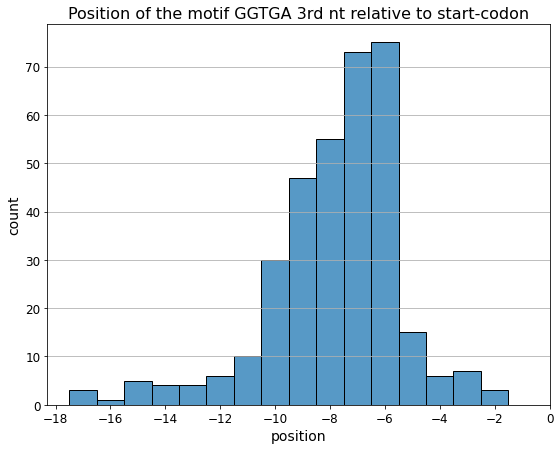

In [25]:
plt.figure(figsize=[9, 7])

sns.histplot(x=-(20 - motifs_good_short["start"] - 2), discrete=True)
plt.grid(True, axis="y")
plt.xticks(np.linspace(-9, 0, 10) * 2, size=12)
plt.yticks(size=12)
plt.xlabel("position", size=14)
plt.ylabel("count", size=14)
plt.title("Position of the motif GGTGA 3rd nt relative to start-codon", size=16)

plt.savefig("motifs_good_short_distance.png", dpi=300)

Extracting the sequences of the motifs found and filtered to build the motif LOGO:

In [26]:
with open("motifs_good_short.txt", "w") as in_file:
    for seq in motifs_good_short["matched_sequence"]:
        in_file.write(f"{seq}\n")

The LOGO built with no adjustment for composition:

In [27]:
%%html

<img src="motifs_good_short.svg", style="height:300px">

Making a table for protein coding genes with the SD sites found:

In [28]:
SD_good_short = motifs_good_short["sequence_name"].apply(lambda x:
                                         small_dataset.iloc[
                                             np.where((small_dataset["min_coord"].apply(str) + "_" +
                                                        small_dataset["max_coord"].apply(str) + "_" +
                                                        ("-1" if x[-2:] == "-1" else "1")) == x[15:])[0][0], [0, 1, 2, -1]])
SD_good_short["SD_sequence"] = motifs_good_short["matched_sequence"]
SD_good_short["SD_to_start_distance"] = 20 - motifs_good_short["stop"]
SD_good_short.reset_index(drop=True)

SD_good_short.to_csv("SD_good_short.tsv", sep="\t", index=False)

#### Refining and analysing the set of good motifs found with the long (less strict) PWM

FDR has been chosen to be 0.1, so all the findings with <i>q-value</i> above 0.1 are being dismissed:

In [29]:
motifs_good_long = pd.read_csv("fimo_good_20_long_01.tsv", sep="\t", index_col=False)
motifs_good_long = motifs_good_long[motifs_good_long["q-value"] <= 0.1]

In [30]:
motifs_good_long.shape

(555, 10)

In [31]:
motifs_good_long["sequence_name"].nunique()

329

There are some sequences with more than 1 motif found, for these CDS upstreams a motif with the best <i>p-value</i> is being chosen:

In [32]:
motifs_good_long = motifs_good_long.iloc[motifs_good_long.groupby("sequence_name")["p-value"].idxmin(), :]

In [33]:
motifs_good_long["matched_sequence"].value_counts()

GGAGGTGAT    8
TGAGGTGAT    7
GGGGGTGAT    6
GGAGGTGAA    6
TGAGGTGGT    5
            ..
GGAGGCGAG    1
CATGGTGAT    1
AGAGGGGAA    1
GGAGGGGCG    1
AAAGGTGGA    1
Name: matched_sequence, Length: 232, dtype: int64

As the motif, that has been searched for, is 9 nt long, there are plenty of matching variants.<br>
To compare the performance of the long PWM with that of the short one, the frequencies of the most expected variants of the SD conserved region, as well as the frequency of a quite unxepected C nt in this region, are being estimated:

In [34]:
print(f'contain GGTGA\t\t\t\t{motifs_good_long["matched_sequence"].apply(lambda x: "GGTGA" in x[-6:-1]).sum()}')
print(f'contain GGTGA/GGAGG/GGTGG/GGGGA\t\t\
{motifs_good_long["matched_sequence"].apply(lambda x: ("GGTGA" in x[-6:-1]) or ("GGAGG" in x[-6:-1]) or ("GGTGG" in x[-6:-1]) or ("GGGGA") in x[-6:-1]).sum()}')
print(f'contain C\t\t\t\t{motifs_good_long["matched_sequence"].apply(lambda x: "C" in x[-6:-1]).sum()}')

contain GGTGA				105
contain GGTGA/GGAGG/GGTGG/GGGGA		174
contain C				43


A histogram of distances to the start-codon is shown below:

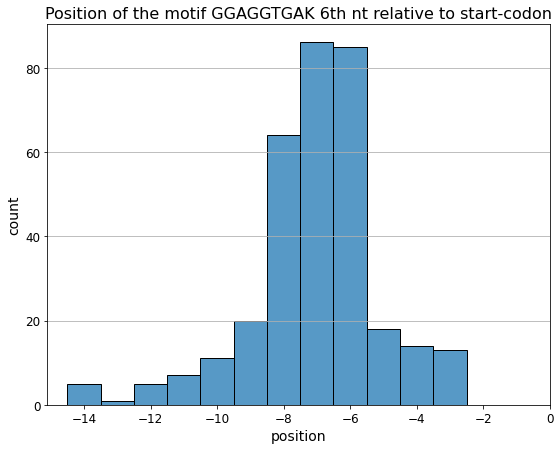

In [35]:
plt.figure(figsize=[9, 7])

sns.histplot(x=-(20 - motifs_good_long["start"] - 5), discrete=True)
plt.grid(True, axis="y")
plt.xticks(np.linspace(-7, 0, 8) * 2, size=12)
plt.yticks(size=12)
plt.xlabel("position", size=14)
plt.ylabel("count", size=14)
plt.title("Position of the motif GGAGGTGAK 6th nt relative to start-codon", size=16)

plt.savefig("motifs_good_long_distance.png", dpi=300)

Extracting the sequences of the motifs found and filtered to build the motif LOGO:

In [36]:
with open("motifs_good_long.txt", "w") as in_file:
    for seq in motifs_good_long["matched_sequence"]:
        in_file.write(f"{seq}\n")

The LOGO is built with no adjustment for composition:

In [37]:
%%html

<img src="motifs_good_long.svg" style="height:300px">

Making a table for protein coding genes with the SD sites found:

In [38]:
SD_good_long = motifs_good_long["sequence_name"].apply(lambda x:
                                         small_dataset.iloc[
                                             np.where((small_dataset["min_coord"].apply(str) + "_" +
                                                        small_dataset["max_coord"].apply(str) + "_" +
                                                        ("-1" if x[-2:] == "-1" else "1")) == x[15:])[0][0], [0, 1, 2, -1]])
SD_good_long["SD_sequence"] = motifs_good_long["matched_sequence"]
SD_good_long["SD_to_start_distance"] = 20 - motifs_good_long["stop"]
SD_good_long.reset_index(drop=True)

SD_good_long.to_csv("SD_good_long.tsv", sep="\t", index=False)

#### $II.$ Now SD motif sites will be searched for in all the CDSs of <i>P. abyssi</i> GE5 chromosome

Using the CDS table, obtained earlier with the <b>features2CDSs.py</b> script:

In [39]:
large_dataset = pd.read_csv("p_abyssi.xls", sep="\t", index_col=False)

l_up = 20
l_down = 15
large_dataset["min_coord"] = large_dataset.apply(lambda x:
                                                 x["min_coord"] - l_up if x["ori"] == 1 else x["max_coord"] - l_down + 1,
                                                 axis=1)
large_dataset["max_coord"] = large_dataset.apply(lambda x:
                                                 x["min_coord"] + l_up + l_down - 1, axis=1)
large_dataset.drop(columns=["pseudo", "protein_id"], inplace=True)

In [40]:
large_dataset.to_csv("large_dataset.xls", sep="\t", index=False)

Making a fasta file of all the upstreams:

In [43]:
!python3 /home/flaumberg/Programs/my_scripts/fragments2fasta.py -i large_dataset.xls -f p_abyssi.fasta\
 -o all_cds_20_15.fasta

wait..

fragment coordinates from large_dataset.xls
fragment sequences from p_abyssi.fasta

writing fragments to all_cds_20_15.fasta

5 fragments written
10 fragments written
50 fragments written
100 fragments written
150 fragments written
200 fragments written
300 fragments written
400 fragments written
500 fragments written
600 fragments written
700 fragments written
800 fragments written
900 fragments written
1000 fragments written
1100 fragments written
1200 fragments written
1300 fragments written
1400 fragments written
1500 fragments written
1600 fragments written
1700 fragments written

1783 fragments have been written
..done


all_cds_20_15.fasta file, comprising 20 nt upstream - 15 nt downstream sequences of all the 1783 CDSs, is now passed to the <b>FIMO</b> program for motif searching with the help of the short (the more strict) PWM:<br>
<b>FIMO</b> is run  with the options: PWM SD_short.txt, scan given strand only, p-value threshold 0.001 (and then 0.01)

As while using 0.001 as the p-value cutoff, there have been find only 587 sites all of them having the same sequence, for the next analysis only the set of sites found by using the p-value cutoff 0.01 (fimo_all_20_15_01.tsv) is considered

#### Refining and analysing the set of motifs found across all the peri-CDS regions of the chromosome

FDR has been chosen to be 0.1, so all the findings with <i>q-value</i> above 0.1 are being dismissed:

In [44]:
motifs_all_short = pd.read_csv("fimo_all_20_15_01.tsv", sep="\t", index_col=False)
motifs_all_short = motifs_all_short[motifs_all_short["q-value"] <= 0.1]

In [45]:
motifs_all_short.shape

(1602, 10)

In [46]:
motifs_all_short["sequence_name"].nunique()

1161

There are some sequences with more than 1 motif found, for these CDS upstreams a motif with the best <i>p-value</i> is being chosen:

In [47]:
motifs_all_short = motifs_all_short.iloc[motifs_all_short.groupby("sequence_name")["p-value"].idxmin(), :]

In [48]:
motifs_all_short["matched_sequence"].value_counts()

GGTGA    560
GGAGG    247
GGTGG    240
GGAGA    114
Name: matched_sequence, dtype: int64

All the sites found seem to be reliable according to their sequences.<br>
A histogram of the distances to annotated start-codon is shown below: 

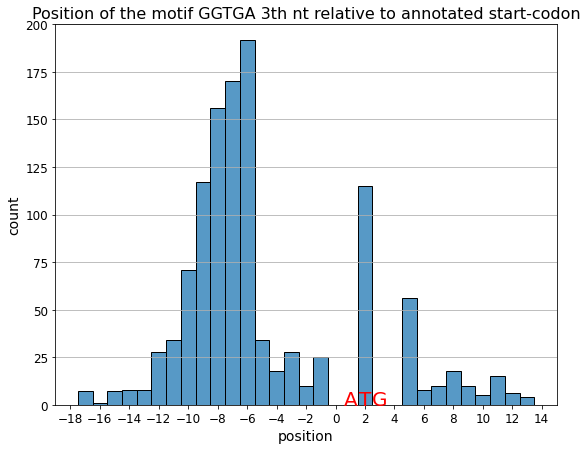

In [50]:
plt.figure(figsize=[9, 7])

sns.histplot(x=-(20 - motifs_all_short["start"] - 2), discrete=True)
plt.grid(True, axis="y")
plt.xticks(np.linspace(-9, 7, 17) * 2, size=12)
plt.yticks(size=12)
plt.ylim(0, 200)
plt.xlabel("position", size=14)
plt.ylabel("count", size=14)
plt.title("Position of the motif GGTGA 3th nt relative to annotated start-codon", size=16)
plt.text(1, 0, "A", size=20, ha="center", color="red")
plt.text(2, 0, "T", size=20, ha="center", color="red")
plt.text(3, 0, "G", size=20, ha="center", color="red")

plt.savefig("motifs_all_short_distance.png", dpi=300)

It can be seen there is a significant amount of SD sites found upstream of start-codon (marked with "ATG" in the histogram). Some of that finding might truly be the SD sites, implying wrong start-codon annotation, while the others should be the artifacts of multiplicity problem (FDR = 0.1, which allows as many as 10% of sites to be false positives) 

Making a table for all the protein coding genes of <i>P. abyssi</i> GE5 chromosome with the SD sites found:

In [53]:
SD_all_short = motifs_all_short["sequence_name"].apply(lambda x:
                                         large_dataset.iloc[
                                             np.where((large_dataset["min_coord"].apply(str) + "_" +
                                                        large_dataset["max_coord"].apply(str) + "_" +
                                                        ("-1" if x[-2:] == "-1" else "1")) == x[15:])[0][0], [0, 1, 2, -1]])
SD_all_short["SD_sequence"] = motifs_all_short["matched_sequence"]
SD_all_short["SD_to_start_distance"] = 20 - motifs_all_short["stop"]
SD_all_short.reset_index(drop=True)

SD_all_short.to_csv("SD_all_short.tsv", sep="\t", index=False)

The check of the unique sequence distribution of sites for those ones found downstream to annotated start-codon hasn't shown anything special, so there is no great reason to consider that sites false positives:

In [55]:
motifs_all_short[motifs_all_short["stop"] > 20]["matched_sequence"].value_counts()

GGTGA    130
GGTGG     57
GGAGA     51
GGAGG     34
Name: matched_sequence, dtype: int64

It is interesting whether there is a greater share of poorly annotated genes among those with SD found downstream to annotated start-codon. Hence applying the chi2-test for independence of variables:

In [56]:
import scipy.stats as sps

In [57]:
obs = pd.crosstab(SD_all_short["SD_to_start_distance"] < 0,
            SD_all_short["product"].apply(lambda x: pd.isna(x) or "hypothetical" in x.lower())) #or "putative" in x.lower()))
obs.index.name = "wrong start"
obs.columns.name = "bad name"
obs

bad name     False  True 
wrong start              
False          632    257
True           183     89

In [58]:
print("Contingency table chi2-test for independence of variables:\n")
print("chi2-statistic = {0[0]}, dof = {0[2]}, p-value = {0[1]}".format(sps.chi2_contingency(obs)))

Contingency table chi2-test for independence of variables:

chi2-statistic = 1.2699990670400303, dof = 1, p-value = 0.25976685492204077


The test has shown no significant dependency between quality of gene name annotation and the position of SD site, which undermines the assumption of wrong start-codon annotation 

Extracting the sequences of the motifs found and filtered to build the motif LOGO:

In [59]:
with open("motifs_all_short.txt", "w") as in_file:
    for seq in motifs_all_short["matched_sequence"]:
        in_file.write(f"{seq}\n")

The LOGO is built with no adjustment for composition:

In [60]:
%%html

<img src="motifs_all_short.svg" style="height:300px">

<b>Analysis complete</b>